# Project 2: Handwritten Digit Recognition with a Simple CNN

## Project Overview

This project focuses on the development and understanding of a Convolutional Neural Network (CNN) for recognizing handwritten digits using the MNIST dataset. It is structured to provide a comprehensive introduction to deep learning techniques and their practical applications. Participants will engage in:

* **Setting up a Python project environment**, emphasizing the importance of virtual environments for effective dependency management in machine learning initiatives.
* **Performing data collection and preprocessing**, which includes normalization, reshaping, and batching of image data, essential steps for the successful application of machine learning models.
* **Designing and refining a CNN architecture**, where participants will gain hands-on experience in neural network design, layer configuration, and model compilation specific to image recognition tasks.
* **Conducting model training and evaluation**, teaching participants to apply training procedures, assess performance metrics, and gauge model accuracy on test data.
* **Executing results analysis and model optimization**, aimed at enhancing model performance through methods such as hyperparameter tuning and data augmentation, while mitigating common issues like overfitting.
* **Preparing the model for deployment**, which covers model conversion for production environments, development of an interaction interface, and comprehensive project documentation for future scalability and reproducibility.

The project aims to build proficiency in utilizing TensorFlow and Keras, equipping participants with the necessary skills to develop, train, and deploy effective machine learning models. Emphasis is placed on following best practices for machine learning project workflows, from data preprocessing to deployment, ensuring participants are well-prepared to handle a variety of data science challenges.

**Estimated Completion Time**

12 to 14 hours


## Task 1: Project Setup and Environment Preparation

**Objective:** Set up the project environment and install necessary libraries to ensure a smooth workflow.

**Activities:**

1. Install Python and necessary libraries (NumPy, TensorFlow/Keras, Matplotlib, etc.).
2. Set up a virtual environment for the project to manage dependencies.
3. Verify the installation by running a simple Python script.

**Estimated Completion Time:** 60 minutes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow import keras
from keras import layers
from keras.optimizers import SGD
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import datetime
from hyperopt import hp, STATUS_OK, tpe, Trials, fmin
import mlflow
import mlflow.tensorflow
import os
%matplotlib inline

## **Task 2: Data Collection and Preprocessing**  

**Objective:** Gather and prepare the handwritten digits data for training and testing the CNN.  

**Activities:**  
1. Download the MNIST dataset.  
2. Normalize the image pixel values and reshape them for the CNN.  
3. Split the data into training, validation, and testing sets.  
4. Perform data augmentation to increase the diversity of the training set (e.g., rotations, translations).  
5. Implement data loaders for efficient loading and batching operations during training.  
6. Visualize the augmented images to verify the data augmentation process.  
7. Save the preprocessed data for easy access in subsequent training sessions.

**Estimated Completion Time:** 180 minutes

1. Download the MNIST dataset.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (60000, 28, 28)
y train shape: (60000,)
X test shape: (10000, 28, 28)
y test shape: (10000,)


2. Normalize the image pixel values and reshape them for the CNN.

In [4]:
# Normalize the image data by diving by 255
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Ensure the input data is in the appropriate format for input into the CNN

In [5]:
# expand_dims to allow to signify that the image is greyscale
X_train_scaled = np.expand_dims(X_train_scaled, axis = 3)
X_test_scaled = np.expand_dims(X_test_scaled, axis = 3)

In [6]:
print(f'X train new shape: {X_train_scaled.shape}')
print(f'X test new shape: {X_test_scaled.shape}')

X train new shape: (60000, 28, 28, 1)
X test new shape: (10000, 28, 28, 1)


3. Split the data into training, validation, and testing sets.

In [7]:
# Add validation data
X_train_scaled, X_validation_scaled, y_train, y_validation = train_test_split(X_train_scaled, y_train, test_size = 0.1, random_state = 42)

In [8]:
print(f'X train shape: {X_train_scaled.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X validation shape: {X_validation_scaled.shape}')
print(f'y validation shape: {y_validation.shape}')
print(f'X test shape: {X_test_scaled.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (54000, 28, 28, 1)
y train shape: (54000,)
X validation shape: (6000, 28, 28, 1)
y validation shape: (6000,)
X test shape: (10000, 28, 28, 1)
y test shape: (10000,)


In [9]:
np.set_printoptions(linewidth=28 * 28)
i = 1
print(y_train[i])  # the class label == the actual digit
print(X_train[i])

6
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 

Convert y_train, y_validation, and y_test to categorical using the to_categorical function

In [10]:
y_train_categorical = to_categorical(y_train, num_classes = 10)
y_validation_categorical = to_categorical(y_validation, num_classes = 10)
y_test_categorical = to_categorical(y_test, num_classes = 10)

4. Perform data augmentation to increase the diversity of the training set (e.g., rotations, translations).

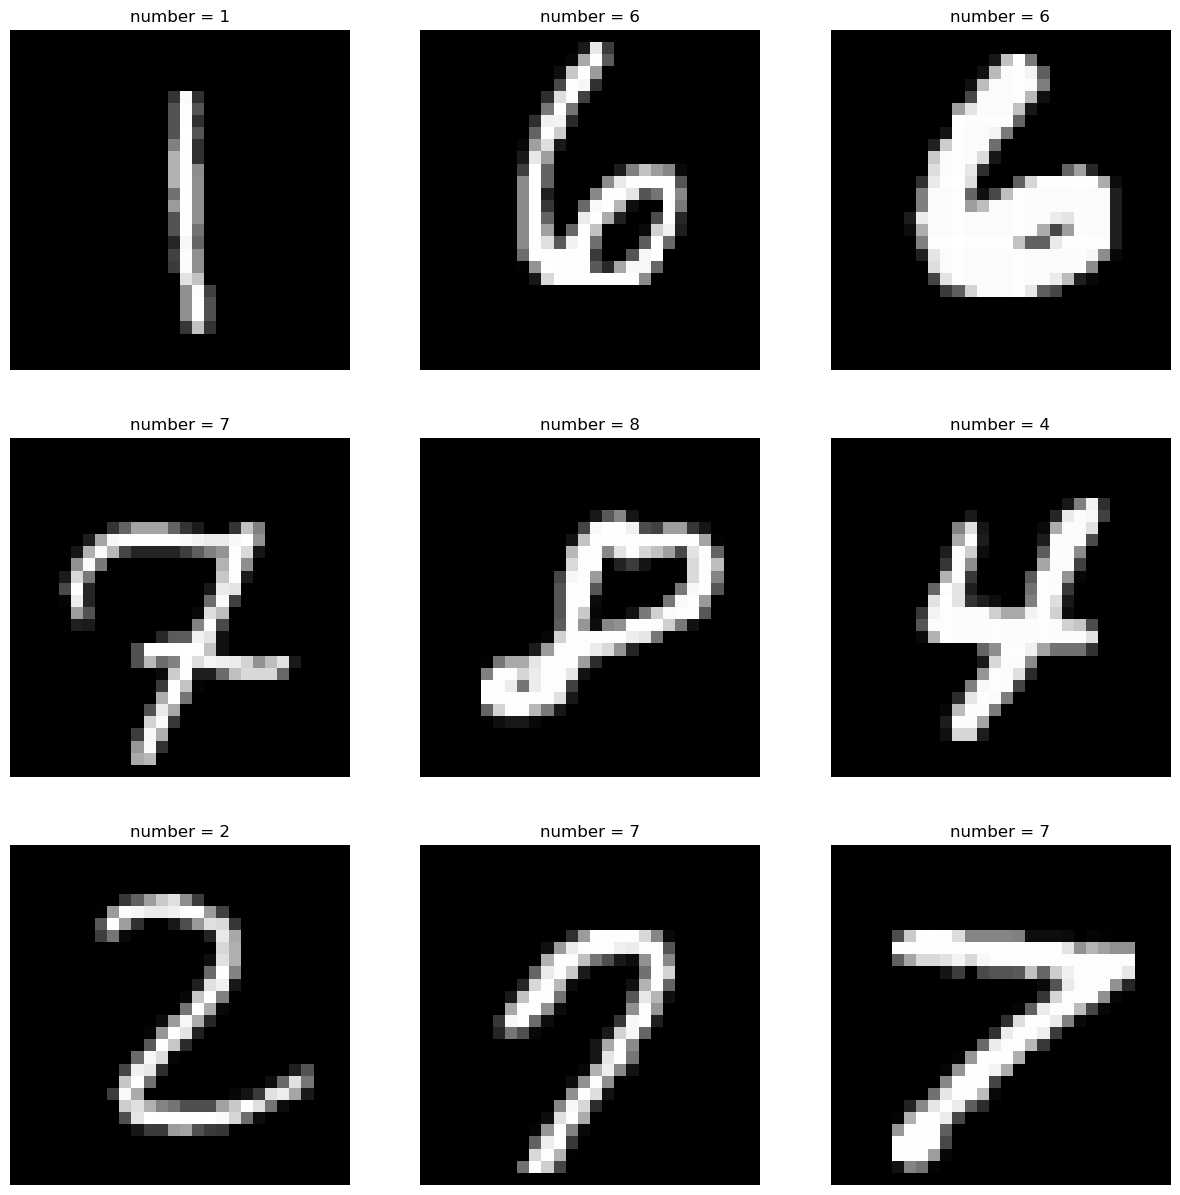

In [11]:
plt.figure(figsize = (15,15))
for i in range(0,9):
    plt.subplot(330 + 1 + i) # Create the 3x3 image grid
    plt.axis('off')
    plt.imshow(X_train_scaled[i][:,:,0], cmap='gray')
    plt.title('number = ' + str(y_train[i]))
plt.show()

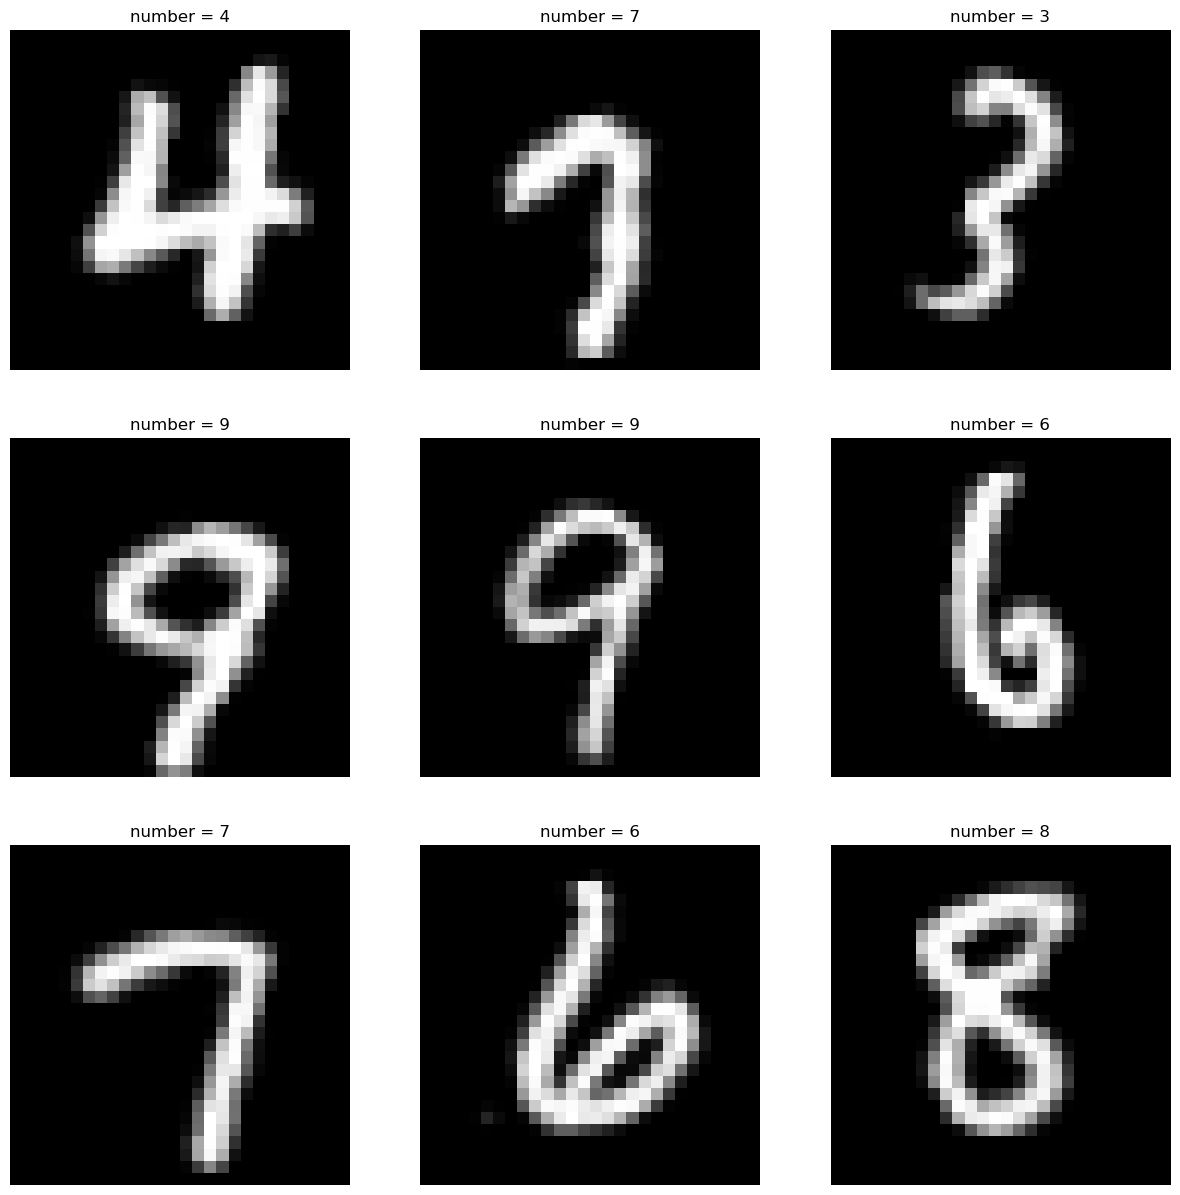

In [12]:
# Create an image generator for the training set 
datagen_train = ImageDataGenerator(rotation_range=10, # Rotating randomly the images up to 25°
                             width_shift_range=0.05, # Moving the images from left to right
                             height_shift_range=0.05, # Then from top to bottom
                             shear_range=0.10, 
                             zoom_range=0.05, # Zooming randomly up to 20%
                             zca_whitening=False,
                             horizontal_flip=False, 
                             vertical_flip=False,
                            fill_mode = 'nearest')

# Plot a subset of those images to inspect the augmentation
datagen_train.fit(X_train_scaled) # Very important to fit the Generator on the data
plt.figure(figsize = (15,15))
for X_batch, y_batch in datagen_train.flow(X_train_scaled, y_train, batch_size=9, seed = 42):
    for i in range(0,9):
        plt.subplot(330 + 1 + i)
        plt.axis('off')
        plt.imshow(X_batch[i][:,:,0], cmap='gray')
        plt.title('number = ' + str(y_batch[i]))
    break
# Since we are now batching, we won't get the exact same images from the last example.

In [13]:
# Create an image generator for the validation set
datagen_validation = ImageDataGenerator(rotation_range=10, # Rotating randomly the images up to 25°
                             width_shift_range=0.05, # Moving the images from left to right
                             height_shift_range=0.05, # Then from top to bottom
                             shear_range=0.10, 
                             zoom_range=0.05, # Zooming randomly up to 20%
                             zca_whitening=False,
                             horizontal_flip=False, 
                             vertical_flip=False,
                            fill_mode = 'nearest')

datagen_validation.fit(X_validation_scaled) # Very important to fit the Generator on the data

Use np.savez_compressed to save the training, validation, and test sets to a compressed .npz file. This method is efficient for storage and quick to load, making it ideal for large datasets.

In [14]:
np.savez_compressed('C:/Users/638658/Downloads/CNN_Data',
                   X_train_scaled = X_train_scaled,
                   X_validation_scaled = X_validation_scaled,
                   X_test_scaled = X_test_scaled,
                   y_train_categorical = y_train_categorical,
                   y_validation_categorical = y_validation_categorical,
                   y_test_categorical = y_test_categorical)

In [15]:
# Verify that the file was saved by printing the shape of X_train_scale
loaded = np.load('C:/Users/638658/Downloads/CNN_Data.npz')
print(loaded['X_train_scaled'].shape)

(54000, 28, 28, 1)


---
---

## **Task 3: Designing the CNN Architecture**  

**Objective:** Design a simple Convolutional Neural Network architecture suitable for handwritten digit recognition.  

**Activities:**

1. Define the CNN layers, including convolutional, activation, pooling, and fully connected layers.  
2. Choose activation functions and initialize weights.  
3. Configure the optimizer, loss function, and metrics for model compilation.  
4. Summarize the model to visualize the architecture and parameters.

**Estimated Completion Time:** 90 minutes

1. Define the CNN layers, including convolutional, activation, pooling, and fully connected layers.

In [16]:
# Define the CNN layers, including convolutional, activation, pooling, and fully connected layers.
def build_model():
    
    input_shape = (28, 28, 1) # 1 is the count of channels (no RGB)

    model = keras.Sequential([
        # // The input layer
        layers.Input(shape=input_shape),
    
        # // Hidden layers
        # Kernel initializer = glorot_uniform, bias_initializer = zeros
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name='CL1'),
        layers.MaxPooling2D(pool_size=(2, 2), name='MPL1'),
        layers.Dropout(rate=0.2),

        # // Hidden layers
        # Kernel initializer = glorot_uniform, bias_initializer = zeros
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu", name='CL2'),
        layers.MaxPooling2D(pool_size=(2, 2), name='MPL2'),
        layers.Dropout(rate=0.2),
    
        layers.Flatten(name='FL'),

        # // Hidden layers
        # Kernel initializer = glorot_uniform, bias_initializer = zeros
        layers.Dense(32, activation='relu', name='DL1'),
        layers.Dropout(rate=0.2),
        
        # // The model's output layer
        # We create a classifier for our model and set it to 10 for each number 0-9
        layers.Dense(10, name="OUTL", activation='softmax'),
      ])

    model.summary()
    print (model.inputs, model.outputs)

    return model

3. Configure the optimizer, loss function, and metrics for model compilation.

In [17]:
# Configure the optimizer, loss function, and metrics for model compilation.
def compile_model(model):
    '''
    Compile the pre-built model with the model hyperparameters.
    Return the compiled model
    '''
    model.compile(    
      # Optimizer is Stochastic Gradient Descent with Nesterov Momentum
      optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),
    
      # The loss function that we need to minimize
      loss=keras.losses.CategoricalCrossentropy(),  # we have a lot of "holes" in the dataset (the black pixels with a value of 0)
     
      # The metrics (can be more than one) to monitor
      metrics=[keras.metrics.CategoricalAccuracy()],
    )

    return model

4. Summarize the model to visualize the architecture and parameters.

In [18]:
# Summarize the model by building it and outputting the summary
model = build_model()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CL1 (Conv2D)                    │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL1 (MaxPooling2D)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CL2 (Conv2D)                    │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL2 (MaxPooling2D)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FL (Flatten)                    │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DL1 (Dense)                     │ (None, 32)             │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUTL (Dense)                    │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,106 (70.73 KB)

 Trainable params: 18,106 (70.73 KB)

 Non-trainable params: 0 (0.00 B)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor>] [<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_10>]



## **Task 4: Model Training and Evaluation**  

**Objective:** Train the CNN with the training data and evaluate its performance on the test set.  

**Activities:**

1. Integrate TensorBoard callbacks for real-time tracking of training metrics.
2. Set up callbacks for model checkpoints, early stopping, and learning rate adjustments.  
3. Train the model with the training set while validating on the validation set.  
4. Use TensorBoard to plot training and validation loss and accuracy.  
5. Evaluate the model on the test set to assess its generalization capability.  
6. Perform error analysis by reviewing misclassified images to understand the model's weaknesses.  
7. Test the model with external images (e.g., hand-drawn digits) to further assess its performance.

**Estimated Completion Time:** 300 minutes

1. Integrate TensorBoard callbacks for real-time tracking of training metrics.

In [19]:
# Integrate TensorBoard callbacks for real-time tracking of training metrics.
log_dir = 'C:/Users/638658/Downloads/logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_images = True)

2. Set up callbacks for model checkpoints, early stopping, and learning rate adjustments.

In [20]:
# Set up callback for model checkpoints
checkpoint_filepath = 'C:/Users/638658/Downloads/logs/checkpoint.model.keras'
checkpoint_callback = ModelCheckpoint(filepath = checkpoint_filepath,
                                   save_best_only = True)

In [21]:
# Set up callback for early stopping, and learning rate adjustments.
earlystopping_callback = EarlyStopping(patience = 5, restore_best_weights = True)

In [22]:
# Set up callback for learning rate adjustments
reduce_lr_callback = ReduceLROnPlateau(patience = 5, factor = 0.2)

3. Train the model with the training set while validating on the validation set.

In [23]:
model = compile_model(model)

In [24]:
model.fit(x = X_train_scaled,
          y = y_train_categorical,
          epochs = 50,
          callbacks = [tensorboard_callback,
                       checkpoint_callback,
                       earlystopping_callback,
                       reduce_lr_callback],
          validation_data = (X_validation_scaled, y_validation_categorical) )

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - categorical_accuracy: 0.7413 - loss: 0.7549 - val_categorical_accuracy: 0.9742 - val_loss: 0.0903 - learning_rate: 0.0100
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9429 - loss: 0.1857 - val_categorical_accuracy: 0.9792 - val_loss: 0.0671 - learning_rate: 0.0100
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9564 - loss: 0.1425 - val_categorical_accuracy: 0.9807 - val_loss: 0.0636 - learning_rate: 0.0100
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.9628 - loss: 0.1264 - val_categorical_accuracy: 0.9858 - val_loss: 0.0496 - learning_rate: 0.0100
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.9664 - loss: 0.1038 - val_categorical_accuracy: 0.9852 - val_loss: 0.0494 - learning_rate: 0.0100
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.9688 - loss: 0.1004 - val_cat

---
---


## **Task 5: Results Analysis and Model Tuning**  

**Objective:** Analyze the results and refine the model for better performance.  

**Activities:**

1. Use TensorBoard to perform detailed analysis of model performance, including confusion matrices and histograms of model weights.
2. Investigate layer activations and feature maps to understand what the model is learning.
3. Experiment with different architectures using `model.get_config()` and hyperparameters to improve performance.
4. Apply techniques like dropout and batch normalization to mitigate overfitting.
5. Evaluate the effects of data augmentation on model robustness using TensorBoard.
6. Conduct ablation studies, using TensorBoard to track and compare results.

**Estimated Completion Time:** 240 minutes



In [25]:
%load_ext tensorboard

In [26]:
%tensorboard --logdir 'C:\Users\638658\Downloads\logs\fit\'

Reusing TensorBoard on port 6006 (pid 36264), started 6 days, 18:02:28 ago. (Use '!kill 36264' to kill it.)

In [27]:
# Create labels for each of the numerical digits
labels = np.arange(0,10)

In [28]:
# Generate predictions from the model on X_test_scaled
y_predictions = model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


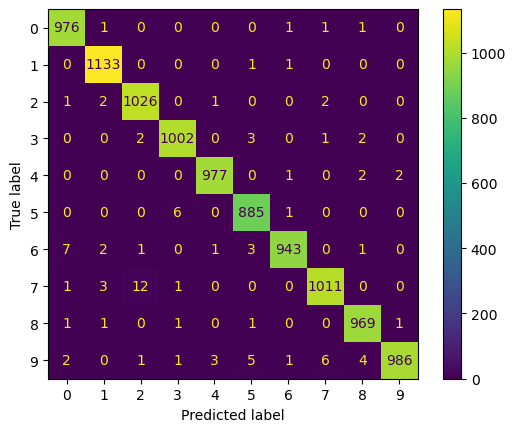

In [29]:
# Generate the confusion matrix to visualize the model's errors
cm = confusion_matrix(y_test, np.argmax(y_predictions,axis=1), labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
plt.show()

The most errors occur between 5 and 3.

The model seems to have the most difficulty discerning 9s

In [30]:
# Find which numbers are confused for others the most
for r in range(cm.shape[0]):
  cm[r,r] = 0

max_cf = cm.max(axis = 1)

for r in range(cm.shape[0]):
   m = np.argmax(cm[r])
   print (f'{r} was confused for {m} {cm[r,m]} times...')

0 was confused for 1 1 times...
1 was confused for 5 1 times...
2 was confused for 1 2 times...
3 was confused for 5 3 times...
4 was confused for 8 2 times...
5 was confused for 3 6 times...
6 was confused for 0 7 times...
7 was confused for 2 12 times...
8 was confused for 0 1 times...
9 was confused for 7 6 times...


In [31]:
# Adding Batch Normalization to the existing architecture to see if performance improves. 
def build_model_tuned():
    
    input_shape = (28, 28, 1) # 1 is the count of channels (no RGB)

    model = keras.Sequential([
        # // The input layer
        layers.Input(shape=input_shape),
    
        # // Hidden layers
        # Kernel initializer = glorot_uniform, bias_initializer = zeros
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name='CL1'),
        layers.BatchNormalization(axis=1),
        layers.MaxPooling2D(pool_size=(2, 2), name='MPL1'),
        layers.Dropout(rate=0.2),

        # // Hidden layers
        # Kernel initializer = glorot_uniform, bias_initializer = zeros
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu", name='CL2'),
        layers.BatchNormalization(axis=1),
        layers.MaxPooling2D(pool_size=(2, 2), name='MPL2'),
        layers.Dropout(rate=0.2),
    
        layers.Flatten(name='FL'),

        # // Hidden layers
        # Kernel initializer = glorot_uniform, bias_initializer = zeros
        layers.Dense(32, activation='relu', name='DL1'),
        layers.BatchNormalization(axis=1),
        layers.Dropout(rate=0.2),
        
        # // The model's output layer
        # We create a classifier for our model and set it to 10 for each number 0-9
        layers.Dense(10, name="OUTL", activation='softmax'),
      ])

    model.summary()
    print (model.inputs, model.outputs)

    return model

In [32]:
model_tuned = build_model_tuned()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CL1 (Conv2D)                    │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           104 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL1 (MaxPooling2D)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CL2 (Conv2D)                    │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 16)     │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MPL2 (MaxPooling2D)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FL (Flatten)                    │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ DL1 (Dense)                     │ (None, 32)             │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUTL (Dense)                    │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,382 (71.80 KB)

 Trainable params: 18,244 (71.27 KB)

 Non-trainable params: 138 (552.00 B)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=None, name=keras_tensor_11>] [<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_24>]


In [33]:
# Compile the tuned model
model_tuned = compile_model(model_tuned)

In [34]:
# Fit the tuned model using the training and validation data
model_tuned.fit(x = X_train_scaled,
          y = y_train_categorical,
          epochs = 50,
          callbacks = [tensorboard_callback,
                       checkpoint_callback,
                       earlystopping_callback,
                       reduce_lr_callback],
          validation_data = (X_validation_scaled, y_validation_categorical) )

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - categorical_accuracy: 0.8349 - loss: 0.5317 - val_categorical_accuracy: 0.9767 - val_loss: 0.0756 - learning_rate: 0.0100
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - categorical_accuracy: 0.9629 - loss: 0.1215 - val_categorical_accuracy: 0.9837 - val_loss: 0.0535 - learning_rate: 0.0100
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - categorical_accuracy: 0.9689 - loss: 0.0993 - val_categorical_accuracy: 0.9872 - val_loss: 0.0429 - learning_rate: 0.0100
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - categorical_accuracy: 0.9730 - loss: 0.0895 - val_categorical_accuracy: 0.9852 - val_loss: 0.0452 - learning_rate: 0.0100
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - categorical_accuracy: 0.9762 - loss: 0.0800 - val_categorical_accuracy: 0.9885 - val_loss: 0.0391 - learning_rate: 0.0100


In [35]:
%tensorboard --logdir 'C:\Users\638658\Downloads\logs\fit\'

Reusing TensorBoard on port 6006 (pid 36264), started 6 days, 18:03:45 ago. (Use '!kill 36264' to kill it.)

---
---



## **Task 6: Model Deployment and Documentation**  

**Objective:** Prepare the model for deployment using MLflow and document the project for reproducibility and sharing. Create and test an API endpoint for the model using Postman.

**Activities:**

1. Convert the trained model into a MLflow-compatible format and log the model in MLflow.
2. Set up MLflow tracking server to manage and store model artifacts.
3. Develop a Flask or FastAPI application that loads the MLflow model and creates an API endpoint for making predictions.
4. Test the API endpoint locally to ensure it is working as expected.
5. Use MLflow to package the API application into a Docker container for easy deployment and scaling.
6. Write comprehensive documentation, detailing the steps for model conversion, MLflow integration, API usage, and deployment process.
7. Use Postman to create and send requests to the deployed API endpoint, validating the model's responses and functionality.
8. Create a GitHub repository to host the project code, MLflow tracking information, documentation, and deployment instructions.

**Estimated Completion Time:** 240 minutes

---
---


In [36]:
search_space = {    
    'filter_1': hp.quniform('filter_1',16, 512, 8),
    'kernel_size_1': hp.choice('kernel_size_1', [(3,3),(5,5)]),
    'dropout_rate_1': hp.uniform('dropout_rate_1', 0.2, 0.7),
    'filter_2': hp.quniform('filter_2',16, 512, 8),
    'kernel_size_2': hp.choice('kernel_size_2', [(3,3),(5,5)]),
    'dropout_rate_2': hp.uniform('dropout_rate_2', 0.2, 0.7),
    'filter_3': hp.quniform('filter_3', 16, 512, 8),
    'dropout_rate_3': hp.uniform('dropout_rate_3', 0.2, 0.7),
}

In [43]:
# Adding Batch Normalization to the existing architecture to see if performance improves. 
def objective(params):
    # Load in MNIST Data
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    
    # Normalize the image data by diving by 255
    X_train_scaled = X_train / 255
    X_test_scaled = X_test / 255
    
    # expand_dims to allow to signify that the image is greyscale
    X_train_scaled = np.expand_dims(X_train_scaled, axis = 3)
    X_test_scaled = np.expand_dims(X_test_scaled, axis = 3)

    # Add validation data
    X_train_scaled, X_validation_scaled, y_train, y_validation = train_test_split(X_train_scaled, y_train, test_size = 0.1, random_state = 42)

    # Convert target variable to categorical
    y_train_categorical = to_categorical(y_train, num_classes = 10)
    y_validation_categorical = to_categorical(y_validation, num_classes = 10)
    y_test_categorical = to_categorical(y_test, num_classes = 10)
    
    input_shape = (28, 28, 1) # 1 is the count of channels (no RGB)

    # Set up callback for model checkpoints
    checkpoint_filepath = 'C:/Users/638658/Downloads/logs/checkpoint.model.keras'
    checkpoint_callback = ModelCheckpoint(filepath = checkpoint_filepath,
                                       save_best_only = True)

    # Set up callback for early stopping, and learning rate adjustments.
    earlystopping_callback = EarlyStopping(patience = 5, restore_best_weights = True)

    # Set up callback for learning rate adjustments
    reduce_lr_callback = ReduceLROnPlateau(patience = 5, factor = 0.2)

    mlflow.keras.autolog()
    with mlflow.start_run():
        # Set up TensorBoard logging
        log_dir = os.path.join('C:/Users/638658/Downloads/logs/fit/', f'run_{mlflow.active_run().info.run_id}')
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
        model = keras.Sequential([
            # // The input layer
            layers.Input(shape=input_shape),
        
            # // Hidden layers
            # Kernel initializer = glorot_uniform, bias_initializer = zeros
            layers.Conv2D(int(params['filter_1']), kernel_size=params['kernel_size_1'], activation="relu", name='CL1'),
            layers.BatchNormalization(axis=1),
            layers.MaxPooling2D(pool_size=(2, 2), name='MPL1'),
            layers.Dropout(rate=params['dropout_rate_1']),
    
            # // Hidden layers
            # Kernel initializer = glorot_uniform, bias_initializer = zeros
            layers.Conv2D(int(params['filter_2']), kernel_size=params['kernel_size_2'], activation="relu", name='CL2'),
            layers.BatchNormalization(axis=1),
            layers.MaxPooling2D(pool_size=(2, 2), name='MPL2'),
            layers.Dropout(rate=params['dropout_rate_2']),
        
            layers.Flatten(name='FL'),
    
            # // Hidden layers
            # Kernel initializer = glorot_uniform, bias_initializer = zeros
            layers.Dense(int(params['filter_3']), activation='relu', name='DL1'),
            layers.BatchNormalization(axis=1),
            layers.Dropout(rate=params['dropout_rate_3']),
            
            # // The model's output layer
            # We create a classifier for our model and set it to 10 for each number 0-9
            layers.Dense(10, name="OUTL", activation='softmax'),
          ])

        model.compile(    
              # Optimizer is Stochastic Gradient Descent with Nesterov Momentum
              optimizer=SGD(learning_rate=1e-2, momentum=0.9, nesterov=True),
            
              # The loss function that we need to minimize
              loss=keras.losses.CategoricalCrossentropy(),  # we have a lot of "holes" in the dataset (the black pixels with a value of 0)
             
              # The metrics (can be more than one) to monitor
              metrics=[keras.metrics.CategoricalAccuracy()],
            )

        # Train model with TensorBoard logging, Checkpoints, Early Stopping, and Reduce LR
        model.fit(x = X_train_scaled,
                  y = y_train_categorical,
                  epochs = 10,
                  callbacks = [tensorboard_callback,
                               checkpoint_callback,
                               earlystopping_callback,
                               reduce_lr_callback],
                  validation_data = (X_validation_scaled, y_validation_categorical),
                  verbose = 0)

        # Evaluate model
        score = model.evaluate(X_test_scaled, y_test_categorical, verbose=0)
        mlflow.log_metric("Test loss", score[0])
        mlflow.log_metric("Test accuracy", score[1])

        # Log TensorBoard logs as MLflow artifacts
        mlflow.log_artifacts(log_dir, "tensorboard_logs")

        return {'loss': score[0], 'status': STATUS_OK, 'model': model}

In [44]:
# Find the best combination of parameters across the entire search space
trials = Trials()
best = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=5,
    trials=trials
)

  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

2024/04/15 11:47:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of keras. If you encounter errors during autologging, try upgrading / downgrading keras to a supported version, or try upgrading MLflow.



 20%|██        | 1/5 [08:16<33:05, 496.37s/trial, best loss: 0.023873213678598404]

2024/04/15 11:55:41 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of keras. If you encounter errors during autologging, try upgrading / downgrading keras to a supported version, or try upgrading MLflow.



 40%|████      | 2/5 [47:30<1:19:27, 1589.28s/trial, best loss: 0.023873213678598404]

2024/04/15 12:34:56 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of keras. If you encounter errors during autologging, try upgrading / downgrading keras to a supported version, or try upgrading MLflow.



 60%|██████    | 3/5 [1:15:13<54:05, 1622.70s/trial, best loss: 0.023873213678598404]

2024/04/15 13:02:38 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of keras. If you encounter errors during autologging, try upgrading / downgrading keras to a supported version, or try upgrading MLflow.



 80%|████████  | 4/5 [1:37:21<25:06, 1506.30s/trial, best loss: 0.02015901543200016] 

2024/04/15 13:24:46 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of keras. If you encounter errors during autologging, try upgrading / downgrading keras to a supported version, or try upgrading MLflow.



100%|██████████| 5/5 [1:44:44<00:00, 1256.97s/trial, best loss: 0.02015901543200016]


In [45]:
best

{'dropout_rate_1': 0.5493444502702927,
 'dropout_rate_2': 0.4324292506331724,
 'dropout_rate_3': 0.2408833316379257,
 'filter_1': 320.0,
 'filter_2': 216.0,
 'filter_3': 32.0,
 'kernel_size_1': 1,
 'kernel_size_2': 0}

In [55]:
from fastapi import FastAPI
import mlflow.pyfunc

# Load the MLflow model as a PyFunc model
app = FastAPI()

@app.post('/predict')
def predict(data: dict):
    # Assuming data is a dictionary with model input
    model = mlflow.pyfunc.load_model('C:/Users/638658/Downloads/mlruns/0/365e3a4f35c74a3fac137b9fa1e98c88/artifacts/model')
    prediction = model.predict(data)
    return {"prediction": prediction}